<a href="https://colab.research.google.com/github/JamileCabral/covid19/blob/main/dataset_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DE DADOS SOBRE A PANDEMIA DE COVID-19**


*URL= https://www.kaggle.com/datasets/tohidkhanbagani/covid-19-deaths-and-vaccinations-dataset?select=COVID+DEATHS.csv*


O presente notebook trata de uma análise de dois datasets contendo informações mundiais sobre a pandemia de Covid-19.

Na análise podem ser encontrados questionamentos que podem ser respondidos através do tratamento desses dados a partir da biblioteca Pandas, primordialmente.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
deaths = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ADA/Módulo IV/COVID DEATHS.csv")
vaccinations = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ADA/Módulo IV/COVID_VACCINATIONS.csv")

In [ ]:
deaths.shape

(302749, 26)

In [ ]:
vaccinations.shape

(302749, 45)

In [ ]:
dataset = deaths.merge(vaccinations, how="left", on=['continent', 'date', 'iso_code', 'location'])
dataset.sample(10)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
101136,GIB,Europe,Gibraltar,11/10/2021,32677,6206.0,38.0,25.286,98.0,0.0,...,NaN,NaN,NaN,NaN,79.93,NaN,NaN,NaN,NaN,NaN
5124,ASM,Oceania,American Samoa,12/8/2020,44295,NaN,0.0,0.000,NaN,0.0,...,NaN,NaN,NaN,NaN,73.74,NaN,NaN,NaN,NaN,NaN
73097,ECU,South America,Ecuador,4/6/2020,18001002,3465.0,0.0,225.000,172.0,0.0,...,2.0,12.3,80.64,1.50,77.01,0.76,NaN,NaN,NaN,NaN
245915,SVK,Europe,Slovakia,5/29/2021,5643455,389588.0,148.0,124.143,12335.0,2.0,...,23.1,37.7,NaN,5.82,77.54,0.86,NaN,NaN,NaN,NaN
97037,GEO,Asia,Georgia,6/23/2020,3744385,911.0,3.0,4.571,14.0,0.0,...,5.3,55.5,NaN,2.60,73.77,0.81,NaN,NaN,NaN,NaN
302656,ZWE,Africa,Zimbabwe,1/10/2023,16320539,260449.0,0.0,36.286,5639.0,0.0,...,1.6,30.7,36.79,1.70,61.49,0.57,NaN,NaN,NaN,NaN
51962,CHL,South America,Chile,5/18/2021,19603736,1292096.0,5548.0,5612.571,27934.0,102.0,...,34.2,41.5,NaN,2.11,80.18,0.85,NaN,NaN,NaN,NaN
245084,SXM,North America,Sint Maarten (Dutch part),5/29/2022,44192,10279.0,0.0,22.286,86.0,0.0,...,NaN,NaN,NaN,NaN,78.95,NaN,NaN,NaN,NaN,NaN
231247,VCT,North America,Saint Vincent and the Grenadines,5/16/2020,103959,17.0,0.0,0.000,NaN,0.0,...,NaN,NaN,NaN,2.60,72.53,0.74,NaN,NaN,NaN,NaN
67384,COD,Africa,Democratic Republic of Congo,12/29/2020,99010216,17180.0,265.0,196.000,584.0,0.0,...,NaN,NaN,4.47,NaN,60.68,0.48,NaN,NaN,NaN,NaN


In [ ]:
dataset.shape

(302749, 67)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302749 entries, 0 to 302748
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302749 non-null  object 
 1   continent                                   288347 non-null  object 
 2   location                                    302749 non-null  object 
 3   date                                        302749 non-null  object 
 4   population                                  302749 non-null  int64  
 5   total_cases                                 266771 non-null  float64
 6   new_cases                                   294064 non-null  float64
 7   new_cases_smoothed                          292800 non-null  float64
 8   total_deaths                                246214 non-null  float64
 9   new_deaths                                  294139 non-null  float64
 

O dataset após o merge apresentou 302749 linhas e 67 colunas, quantidades altas de dados para análise. Por isso, foram feitos dataframes com agrupamentos compactados contendo apenas colunas de dados relevantes para cada pergunta a ser respondida.

**A taxa de reprodução do vírus é mais intensa em países mais populosos?**

---

Análise se as taxas mais altas de reprodução do vírus pode estar correlacionada ao contigente de população.

In [ ]:
# dataframe com continent, location, population e reproduction_rate

dataset_df = dataset.groupby(
    by=['continent', 'location']).agg({
    "population": "last",
    "reproduction_rate": "mean"
}).reset_index()


dataset_df.sample(10)

,continent,location,population,reproduction_rate
225,Oceania,Tonga,106867,0.507895
30,Africa,Malawi,20405318,0.958445
139,Europe,Luxembourg,647601,1.077738
222,Oceania,Samoa,222390,0.586528
77,Asia,Kuwait,4268886,0.921934
97,Asia,Sri Lanka,21832150,0.987110
112,Europe,Belarus,9534956,0.793135
61,Asia,Bahrain,1472237,1.021440
187,North America,Jamaica,2827382,0.959607
94,Asia,Saudi Arabia,36408824,1.014609


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          243 non-null    object 
 1   location           243 non-null    object 
 2   population         243 non-null    int64  
 3   reproduction_rate  194 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ KB


In [ ]:
# pegando os 15 paises mais populosos

mais_populosos = dataset_df.sort_values(by='population', ascending=False)

mais_populosos.head(15)

,continent,location,population,reproduction_rate
66,Asia,China,1425887360,1.047751
69,Asia,India,1417173120,1.035479
203,North America,United States,338289856,1.080938
70,Asia,Indonesia,275501344,1.038055
90,Asia,Pakistan,235824864,0.964917
39,Africa,Nigeria,218541216,1.009277
231,South America,Brazil,215313504,1.090556
62,Asia,Bangladesh,171186368,1.015385
151,Europe,Russia,144713312,1.046200
189,North America,Mexico,127504120,1.024990


In [ ]:
# pegando os 15 paises com maior reproduction rate

maiores_rates = dataset_df.sort_values(by='reproduction_rate', ascending=False)

maiores_rates.head(15)

,continent,location,population,reproduction_rate
157,Europe,Spain,47558632,1.148272
158,Europe,Sweden,10549349,1.143828
113,Europe,Belgium,11655923,1.123140
159,Europe,Switzerland,8740471,1.109535
125,Europe,Germany,83369840,1.097541
206,Oceania,Australia,26177410,1.095496
231,South America,Brazil,215313504,1.090556
124,Europe,France,67813000,1.089017
239,South America,Peru,34049588,1.081009
203,North America,United States,338289856,1.080938


*Análise dos resultados:*


> De acordo com a amostragem dos dataframes, poucos paises mais populosos do mundo estão entre as nações com taxas de reprodução mais altas.



**Qual continente foi mais afetado pelo Covid?**

---

Análise de qual(is) continente(s) apresenta maiores quantidades de mortes e de casos.

In [ ]:
# dataframe com continent, location, population, total_cases, total_deaths

dataset_df2 = dataset.groupby(
    by=['continent', 'location']).agg({
    "population": "max",
    "total_cases": "last",
    "total_deaths": "last",
}).reset_index()


dataset_df2.sample(10)

,continent,location,population,total_cases,total_deaths
32,Africa,Mauritania,4736146,63562.0,997.0
17,Africa,Eritrea,3684041,10189.0,103.0
206,Oceania,Australia,26177410,11153745.0,19906.0
89,Asia,Oman,4576300,399449.0,4628.0
27,Africa,Liberia,5302690,8090.0,294.0
20,Africa,Gabon,2388997,48981.0,306.0
23,Africa,Guinea,13859349,38280.0,467.0
155,Europe,Slovakia,5643455,1865828.0,21123.0
126,Europe,Gibraltar,32677,20550.0,113.0
18,Africa,Eswatini,1201680,74520.0,1425.0


In [ ]:
sum_df2 = dataset_df2.groupby(
    'continent').sum(numeric_only=True).reset_index()

sum_df2

,continent,population,total_cases,total_deaths
0,Africa,1426736614,13074358.0,258841.0
1,Asia,4721838226,295846519.0,1628478.0
2,Europe,814493270,248182442.0,2038559.0
3,North America,600323657,123498707.0,1592266.0
4,Oceania,45038907,13860132.0,25926.0
5,South America,436816679,68328230.0,1352942.0


In [ ]:
sum_continentes = sum_df2.sort_values(by='total_cases', ascending=False)
sum_continentes

,continent,population,total_cases,total_deaths
1,Asia,4721838226,295846519.0,1628478.0
2,Europe,814493270,248182442.0,2038559.0
3,North America,600323657,123498707.0,1592266.0
5,South America,436816679,68328230.0,1352942.0
4,Oceania,45038907,13860132.0,25926.0
0,Africa,1426736614,13074358.0,258841.0


In [ ]:
sum_continentes = sum_df2.sort_values(by='total_deaths', ascending=False)
sum_continentes

,continent,population,total_cases,total_deaths
2,Europe,814493270,248182442.0,2038559.0
1,Asia,4721838226,295846519.0,1628478.0
3,North America,600323657,123498707.0,1592266.0
5,South America,436816679,68328230.0,1352942.0
0,Africa,1426736614,13074358.0,258841.0
4,Oceania,45038907,13860132.0,25926.0


<Axes: xlabel='continent', ylabel='total_deaths'>

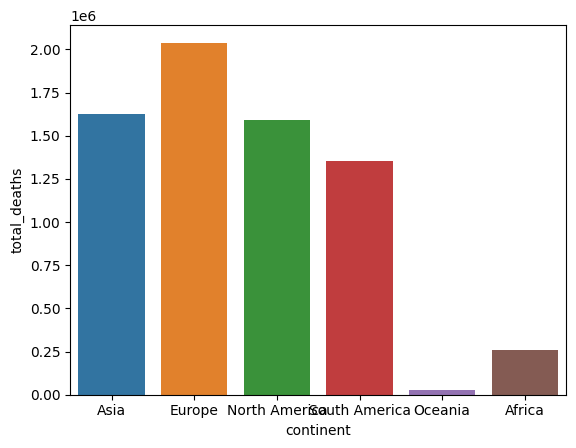

In [ ]:
df = sum_continentes
sns.barplot(data=df, x="continent", y="total_deaths")

*Análise dos resultados:*


> O continente que apresentou mais registros de casos foi a Ásia, com 295.846.519 casos.

> O continente que registrou o maior contingente de mortes foi a Europa, com 2.038.559 mortes.

**Quais foram os 5 países com maior % de mortes em relação a sua população total?**


---

Percepção dos 5 paises onde o impacto da quantidade mortes em relação à população total foi maior em porcentagem.

In [ ]:
# criação de uma nova coluna com a porcentagem das mortes totais em relação a população de cada país

dataset_df3 = dataset_df2.copy(deep=True)
dataset_df3

,continent,location,population,total_cases,total_deaths
0,Africa,Algeria,44903228,271613.0,6881.0
1,Africa,Angola,35588996,105353.0,1934.0
2,Africa,Benin,13352864,28014.0,163.0
3,Africa,Botswana,2630300,329837.0,2795.0
4,Africa,Burkina Faso,22673764,22056.0,396.0
...,...,...,...,...,...
238,South America,Paraguay,6780745,735759.0,19880.0
239,South America,Peru,34049588,4492891.0,219866.0
240,South America,Suriname,618046,82495.0,1404.0
241,South America,Uruguay,3422796,1036159.0,7621.0


In [ ]:
# o total de mortes foi multiplicado por 1000 pois os dados dessa coluna encontram-se em float e aumentam 1 casa decimal à esquerda no resultado final

dataset_df3['death_per_population'] = dataset_df3['total_deaths']* 1000 / dataset_df3['population']

In [ ]:
# ordenando por ordem decrescente a porcentagem de morte por população

percent_death = dataset_df3.sort_values(by='death_per_population', ascending=False)
percent_death.head(5)

,continent,location,population,total_cases,total_deaths,death_per_population
239,South America,Peru,34049588,4492891.0,219866.0,6.457229
115,Europe,Bulgaria,6781955,1301475.0,38282.0,5.644685
114,Europe,Bosnia and Herzegovina,3233530,402636.0,16328.0,5.049590
129,Europe,Hungary,9967304,2199764.0,48719.0,4.887881
145,Europe,North Macedonia,2093606,347672.0,9667.0,4.617392


*Análise dos resultados:*

> Percebe-se que, com exceção do país que apresentou a maior porcentagem da relação de dados mortes/população, os primeiros paises pertencem ao continente Europeu.

**Qual o top10 de países que receberam a primeira dose da vacina, pelo menos? E o top10 de países que receberam a dose prescrita?**


---

Analisar o cruzamento de dados entre duas amostragens de dados, se os mesmos paises aparecem em ambos.


In [ ]:
# agrupando os dados sobre vacinação

vaccines_df = dataset.groupby(
    by=['continent', 'location']).agg({
    'total_vaccinations': 'last',
    'people_vaccinated': 'last',
    'people_fully_vaccinated': 'max',
    'total_boosters': 'max'
}).reset_index()


In [ ]:
total_vac = vaccines_df.sort_values(by='total_vaccinations', ascending=False)
total_vac.head(10)

,continent,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
66,Asia,China,3.491077e+09,1.310292e+09,1.276760e+09,826913000.0
69,Asia,India,2.206599e+09,1.027403e+09,9.519652e+08,227231387.0
203,North America,United States,6.747119e+08,2.701428e+08,2.304676e+08,132805962.0
231,South America,Brazil,4.864364e+08,1.896434e+08,1.761642e+08,126388587.0
70,Asia,Indonesia,4.443031e+08,2.036575e+08,1.726933e+08,67952274.0
74,Asia,Japan,3.835123e+08,1.046979e+08,1.033708e+08,175443593.0
62,Asia,Bangladesh,3.579821e+08,1.513194e+08,1.397780e+08,67466257.0
90,Asia,Pakistan,3.349819e+08,1.625439e+08,1.401366e+08,50523363.0
107,Asia,Vietnam,2.659802e+08,9.022840e+07,8.586169e+07,57812354.0
189,North America,Mexico,2.231590e+08,9.717949e+07,8.184996e+07,57026630.0


In [ ]:
full_vac = vaccines_df.sort_values(by='people_fully_vaccinated', ascending=False)
full_vac.head(10)

,continent,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
66,Asia,China,3.491077e+09,1.310292e+09,1.276760e+09,826913000.0
69,Asia,India,2.206599e+09,1.027403e+09,9.519652e+08,227231387.0
203,North America,United States,6.747119e+08,2.701428e+08,2.304676e+08,132805962.0
231,South America,Brazil,4.864364e+08,1.896434e+08,1.761642e+08,126388587.0
70,Asia,Indonesia,4.443031e+08,2.036575e+08,1.726933e+08,67952274.0
90,Asia,Pakistan,3.349819e+08,1.625439e+08,1.401366e+08,50523363.0
62,Asia,Bangladesh,3.579821e+08,1.513194e+08,1.397780e+08,67466257.0
74,Asia,Japan,3.835123e+08,1.046979e+08,1.033708e+08,175443593.0
107,Asia,Vietnam,2.659802e+08,9.022840e+07,8.586169e+07,57812354.0
189,North America,Mexico,2.231590e+08,9.717949e+07,8.184996e+07,57026630.0


*Análise dos resultados:*

> Os top 10 paises com no mínimo 1 dose aplicada e os com a dose prescrita completa são os mesmos nos dois casos, variando apenas a colocação de três paises nas posições 7, 8 e 9.



**Países com maior densidade populacional foram mais restritos?**


---

Perceber se as autoridades locais tiveram mais restrição onde possivelmente, o vírus se espalharia com mais facilidade.

In [ ]:
dataset_df4 = dataset.groupby(by=['continent','location']).agg({
    'population':'max',
    'stringency_index': 'last',
    'population_density': 'max',
}).reset_index()

dataset_df4.sample(10)

,continent,location,population,stringency_index,population_density
157,Europe,Spain,47558632,11.11,93.11
2,Africa,Benin,13352864,11.11,99.11
40,Africa,Reunion,974062,NaN,NaN
232,South America,Chile,19603736,13.89,24.28
227,Oceania,Vanuatu,326744,11.11,22.66
144,Europe,Netherlands,17564020,11.11,508.54
217,Oceania,Niue,1952,NaN,NaN
223,Oceania,Solomon Islands,724272,30.46,21.84
25,Africa,Kenya,54027484,22.77,87.32
206,Oceania,Australia,26177410,11.11,3.20


In [ ]:
# agrupando os 15 paises com maior densidade populacional

density = dataset_df4.sort_values(by='population_density', ascending=False)
density.head(15)

,continent,location,population,stringency_index,population_density
81,Asia,Macao,695180,36.11,20546.77
142,Europe,Monaco,36491,11.11,19347.50
95,Asia,Singapore,5637022,17.59,7915.73
68,Asia,Hong Kong,7488863,11.11,7039.71
126,Europe,Gibraltar,32677,NaN,3457.10
61,Asia,Bahrain,1472237,11.11,1935.91
83,Asia,Maldives,523798,NaN,1454.43
140,Europe,Malta,533293,11.11,1454.04
170,North America,Bermuda,64207,24.07,1308.82
62,Asia,Bangladesh,171186368,13.89,1265.04


In [ ]:
# agrupando os 15 paises com maior restrição

stringency = dataset_df4.sort_values(by='stringency_index', ascending=False)
stringency.head(15)

,continent,location,population,stringency_index,population_density
71,Asia,Iran,88550568,53.94,49.83
57,Africa,Zimbabwe,16320539,53.70,42.73
66,Asia,China,1425887360,47.69,147.67
60,Asia,Azerbaijan,10358078,44.92,119.31
90,Asia,Pakistan,235824864,40.54,255.57
54,Africa,Uganda,47249588,38.44,213.76
46,Africa,Sierra Leone,8605723,37.96,104.70
85,Asia,Myanmar,54179312,37.04,81.72
184,North America,Guatemala,17843914,36.57,157.83
81,Asia,Macao,695180,36.11,20546.77


*Análise dos resultados*



> Confome os dataframes demonstram, apenas Macau aparece em ambos. Pode-se perceber com essa amostra de 15 paises que os locais com maior densidade populacional não teve mais restrição.



**Países com maior índice de rigidez nas medidas restritivas tendem a ter uma taxa de vacinação mais alta?**


---

Perceber se os locais que tiveram mais restrição também são os que mais vacinaram.

In [ ]:
# agrupando os 20 paises com maior restrição

stringency = dataset_df4.sort_values(by='stringency_index', ascending=False)
stringency.head(20)

,continent,location,population,stringency_index,population_density
71,Asia,Iran,88550568,53.94,49.83
57,Africa,Zimbabwe,16320539,53.70,42.73
66,Asia,China,1425887360,47.69,147.67
60,Asia,Azerbaijan,10358078,44.92,119.31
90,Asia,Pakistan,235824864,40.54,255.57
54,Africa,Uganda,47249588,38.44,213.76
46,Africa,Sierra Leone,8605723,37.96,104.70
85,Asia,Myanmar,54179312,37.04,81.72
184,North America,Guatemala,17843914,36.57,157.83
81,Asia,Macao,695180,36.11,20546.77


In [ ]:
total_vac = vaccines_df.sort_values(by='total_vaccinations', ascending=False)
total_vac.head(20)

,continent,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
66,Asia,China,3.491077e+09,1.310292e+09,1.276760e+09,826913000.0
69,Asia,India,2.206599e+09,1.027403e+09,9.519652e+08,227231387.0
203,North America,United States,6.747119e+08,2.701428e+08,2.304676e+08,132805962.0
231,South America,Brazil,4.864364e+08,1.896434e+08,1.761642e+08,126388587.0
70,Asia,Indonesia,4.443031e+08,2.036575e+08,1.726933e+08,67952274.0
74,Asia,Japan,3.835123e+08,1.046979e+08,1.033708e+08,175443593.0
62,Asia,Bangladesh,3.579821e+08,1.513194e+08,1.397780e+08,67466257.0
90,Asia,Pakistan,3.349819e+08,1.625439e+08,1.401366e+08,50523363.0
107,Asia,Vietnam,2.659802e+08,9.022840e+07,8.586169e+07,57812354.0
189,North America,Mexico,2.231590e+08,9.717949e+07,8.184996e+07,57026630.0


*Análise dos resultados:*


>De acordo com a amostragem dos dataframes, apenas alguns paises aparecem em ambos, o que permite a compreensão de que a alta restrição não assegurou altos números de vacinações.

